## Imports

In [3]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [20]:
name="DATA/CYLINDER_ALL.mat"
data=loadmat(name)

FileNotFoundError: [Errno 2] No such file or directory: 'DATA/CYLINDER_ALL.mat'

## Extracting and reshaping the datasets

In [21]:
nx = int(data['nx'][0,0])
ny = int(data['ny'][0,0])
U=np.zeros((nx,ny,151))
V=np.zeros((nx,ny,151))
VORT=np.zeros((nx,ny,151))
Snapshots=np.zeros((nx*ny,151))
for i in range(151):
    U[:,:,i] = data['UALL'][:,i].reshape(ny,nx).T
    V[:,:,i] = data['VALL'][:,i].reshape(ny,nx).T
    VORT[:,:,i] = data['VORTALL'][:,i].reshape(ny,nx).T
    Snapshots[:,i] = data['VORTALL'][:,i]
print(f"nx: {nx}" + '\n' + f"ny: {ny}")

nx: 199
ny: 449


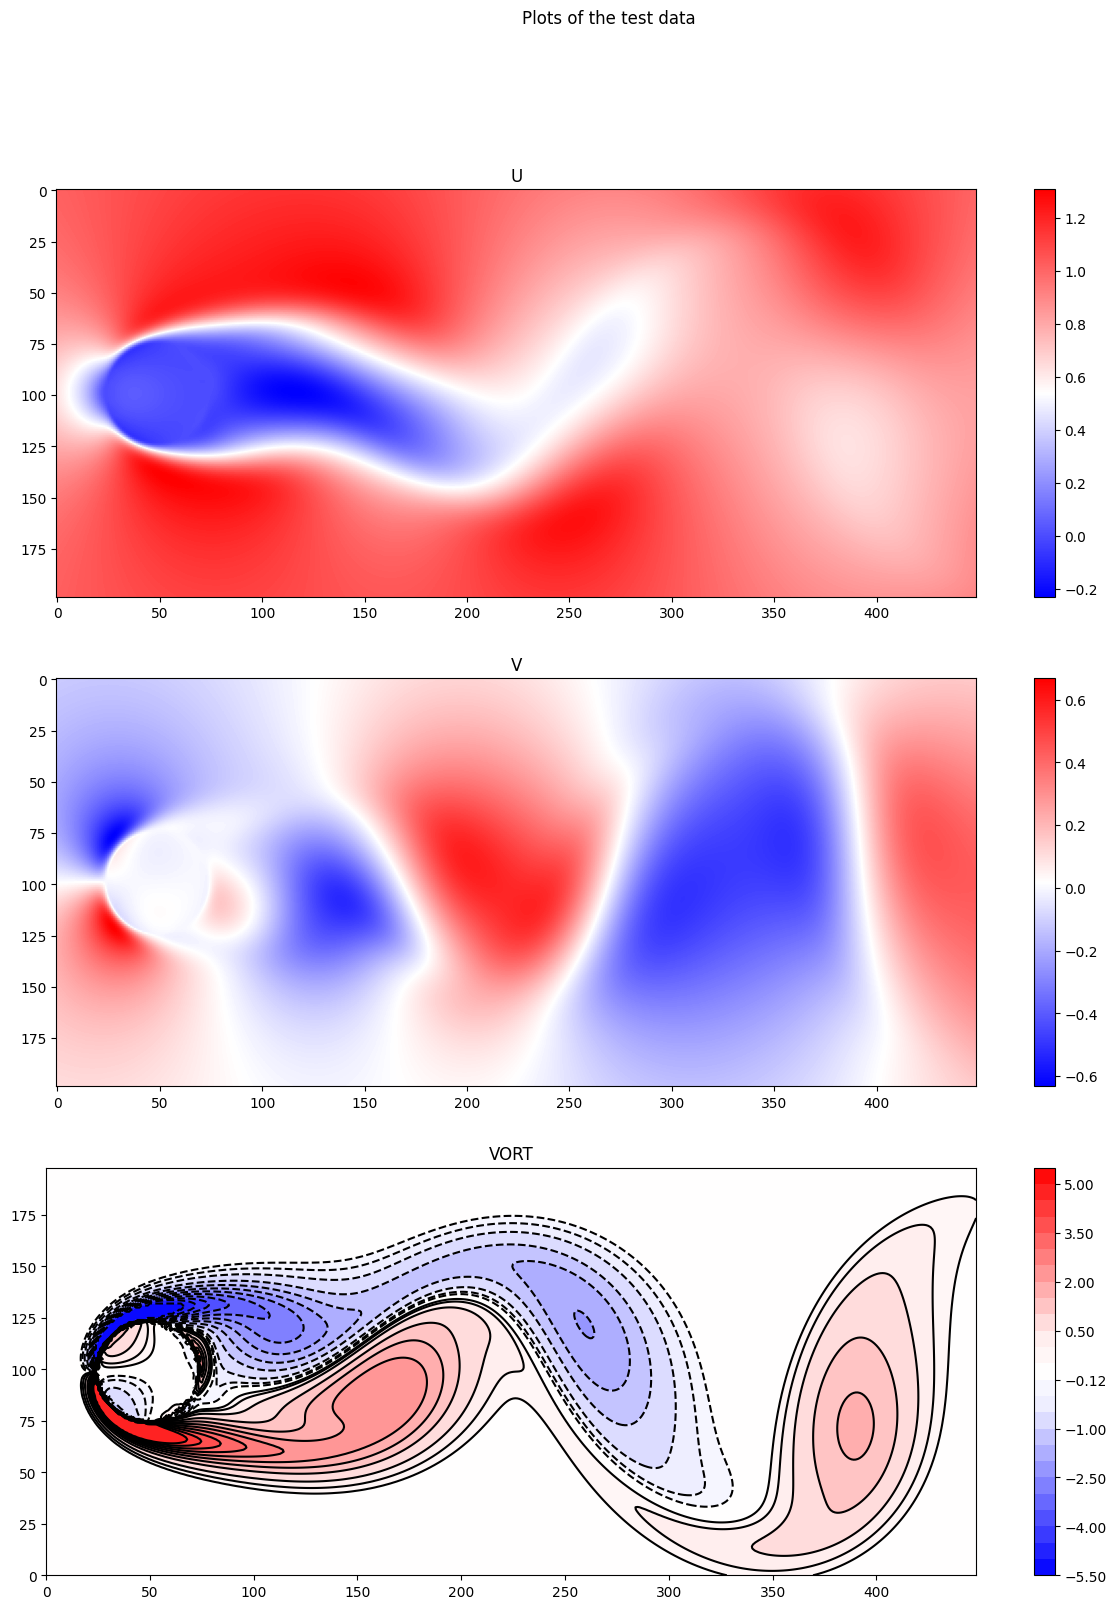

In [22]:
U_test = data['UEXTRA'].reshape(ny,nx).T
V_test = data['VEXTRA'].reshape(ny,nx).T
VORT_test = data['VORTEXTRA'].reshape(ny,nx).T
VORT_test[VORT_test > 5] = 5
VORT_test[VORT_test < -5] = -5

def plot_vort(VORT):
    levels=np.concatenate((np.linspace(-5.5,-0.5,11),np.array([-0.25,-0.125]),np.array([0.125,0.25]),np.linspace(.5,5.5,11)))
    plt.contourf(VORT,levels=levels, cmap='bwr')
    plt.title("VORT")
    plt.colorbar()
    plt.contour(VORT, levels=levels,colors='k')

plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
plt.imshow(U_test,  cmap='bwr')
plt.title("U") 
plt.colorbar()

plt.subplot(3,1,2)
plt.imshow(V_test, cmap='bwr')
plt.title("V")
plt.colorbar()

plt.subplot(3,1,3)
plot_vort(VORT_test)

plt.suptitle('Plots of the test data')
plt.show()

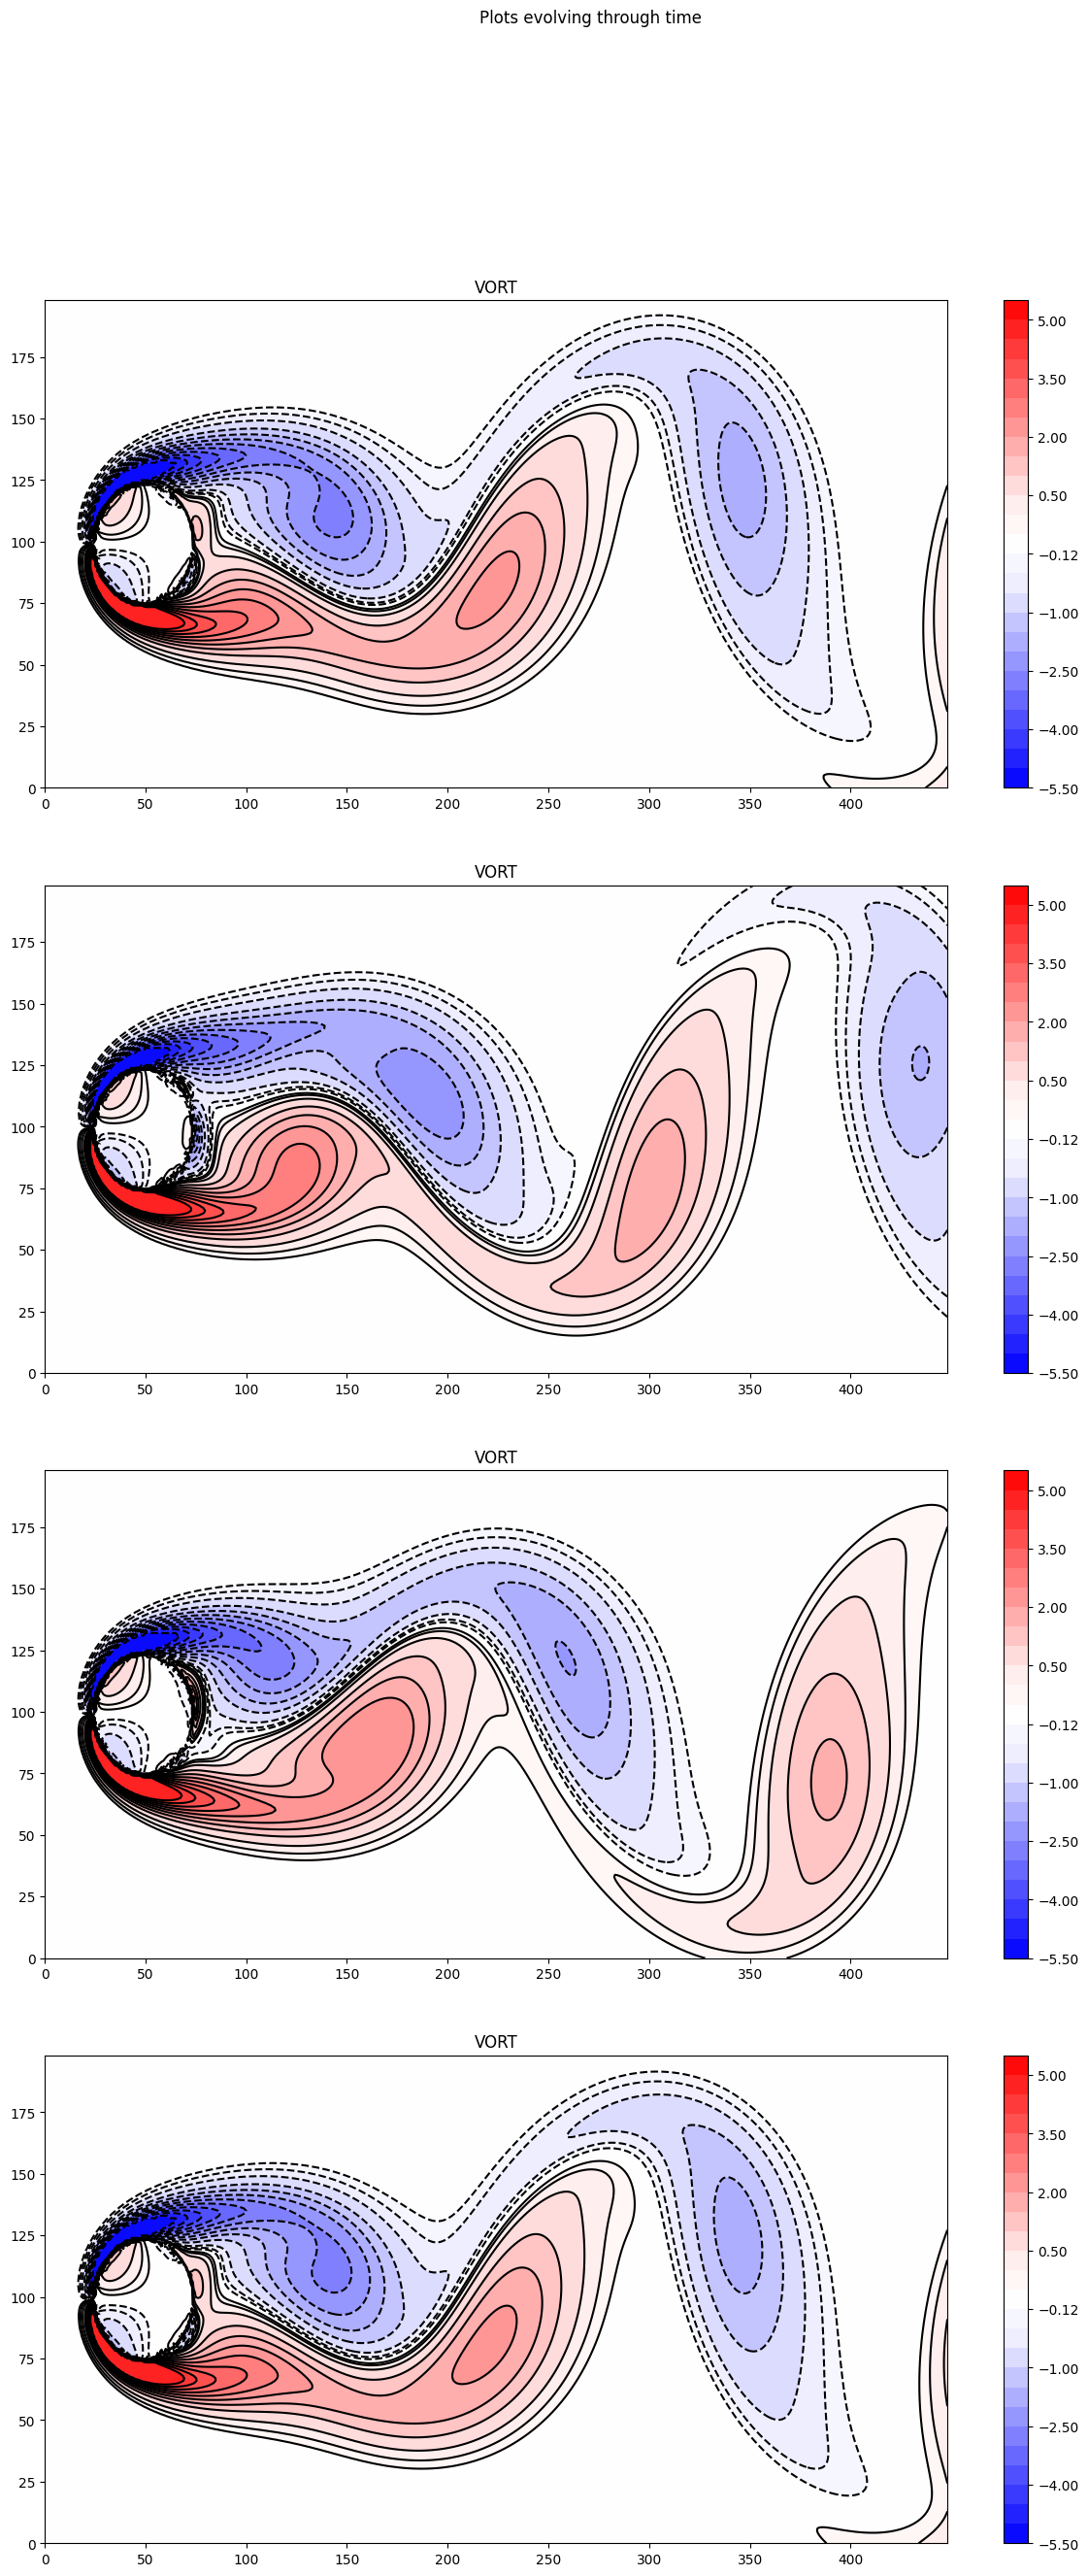

In [24]:
plt.figure(figsize=(15,30))
for i in range(1,5):
    VORT_test2 = VORT[:,:,i*10]
    VORT_test2[VORT_test2 > 5] = 5
    VORT_test2[VORT_test2 < -5] = -5
    plt.subplot(4,1,i)
    plot_vort(VORT_test2)
plt.suptitle('Plots evolving through time')
plt.show()

(199, 449, 151)


Text(0.5, 0.98, 'Reconstructed vorticity vs measured vorticity at the first time')

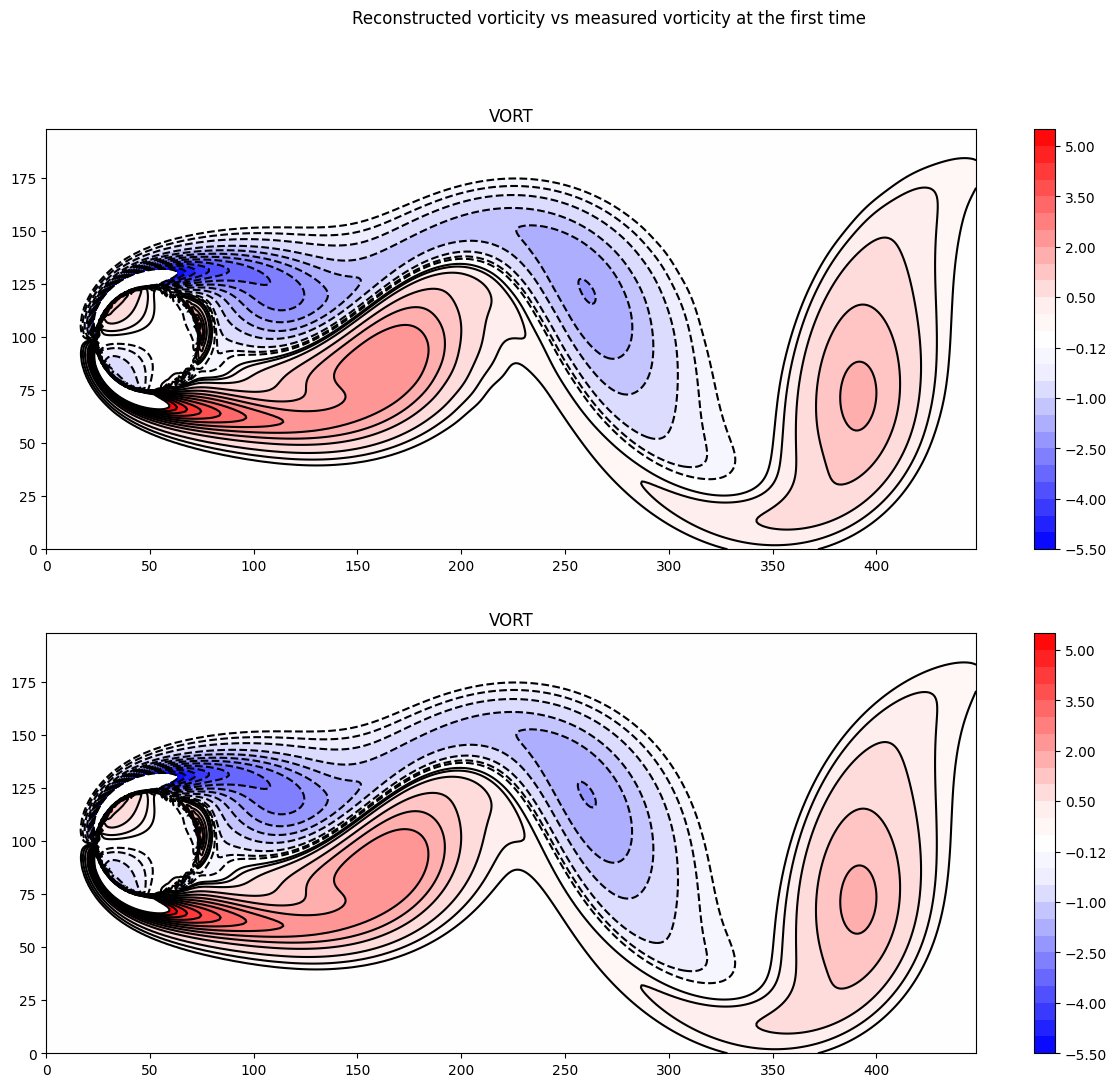

In [41]:
dmd = DMD(svd_rank=21,sorted_eigs='real')
dmd.fit(VORT)
reconstruction = dmd.reconstructed_data.real.reshape(nx,ny,151)
print(reconstruction.shape)
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plot_vort(reconstruction[:,:,0])
plt.subplot(2,1,2)
plot_vort(VORT[:,:,0])
plt.suptitle('Reconstructed vorticity vs measured vorticity at the first time')

[ 0.99999989+0.j          0.9784781 +0.20635004j  0.9784781 -0.20635004j
  0.91483903+0.40381753j  0.91483903-0.40381753j  0.81182272+0.58390351j
  0.81182272-0.58390351j  0.67386396+0.73885818j  0.67386396-0.73885818j
  0.50689681+0.86201087j  0.50689681-0.86201087j  0.31810572+0.94805393j
  0.31810572-0.94805393j  0.11563884+0.9932569j   0.11563884-0.9932569j
 -0.08120289+0.j         -0.09192684+0.99564312j -0.09192684-0.99564312j
 -0.1055549 +0.j         -0.29546912+0.95525184j -0.29546912-0.95525184j]


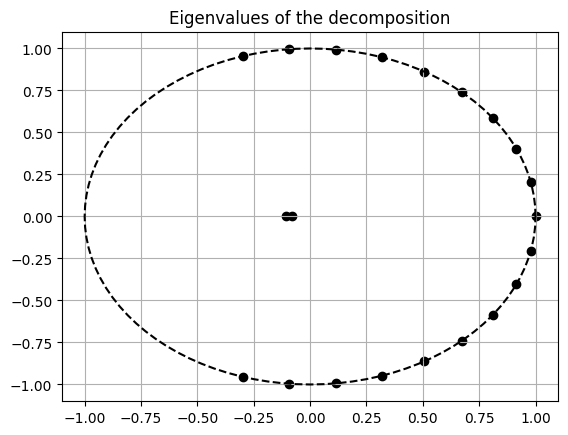

In [43]:
import numpy as np
import matplotlib.pyplot as plt

eigs_dmd = dmd.eigs
eigs_dmd = eigs_dmd[::-1]
print(eigs_dmd)

# Generate theta values
theta = np.arange(0, 101) * 2 * np.pi / 100

# Plot unit circle
plt.plot(np.cos(theta), np.sin(theta), 'k--')

# Scatter plot
eigs = np.diag(eigs_dmd)
plt.scatter(np.real(eigs_dmd), np.imag(eigs_dmd), color='black', marker='o')

# Set axis limits
plt.axis([-1.1, 1.1, -1.1, 1.1])

# Add grid
plt.grid(True)
plt.title('Eigenvalues of the decomposition')

# Show plot
plt.show()

## Modes decomposition

Associated eigenvalue : (0.9999998943065165+0j)
Associated eigenvalue : (0.9784780987795176+0.20635003589345713j)
Associated eigenvalue : (0.9148390305208395+0.40381752653446545j)
Associated eigenvalue : (0.8118227155945494+0.5839035111637332j)
Associated eigenvalue : (0.6738639576810584+0.7388581787315388j)
Associated eigenvalue : (0.50689681433667+0.8620108685701701j)
Associated eigenvalue : (0.3181057241609902+0.9480539302203053j)
Associated eigenvalue : (0.11563884347557715+0.9932569030491983j)
Associated eigenvalue : (-0.09192683811958863+0.9956431214203161j)


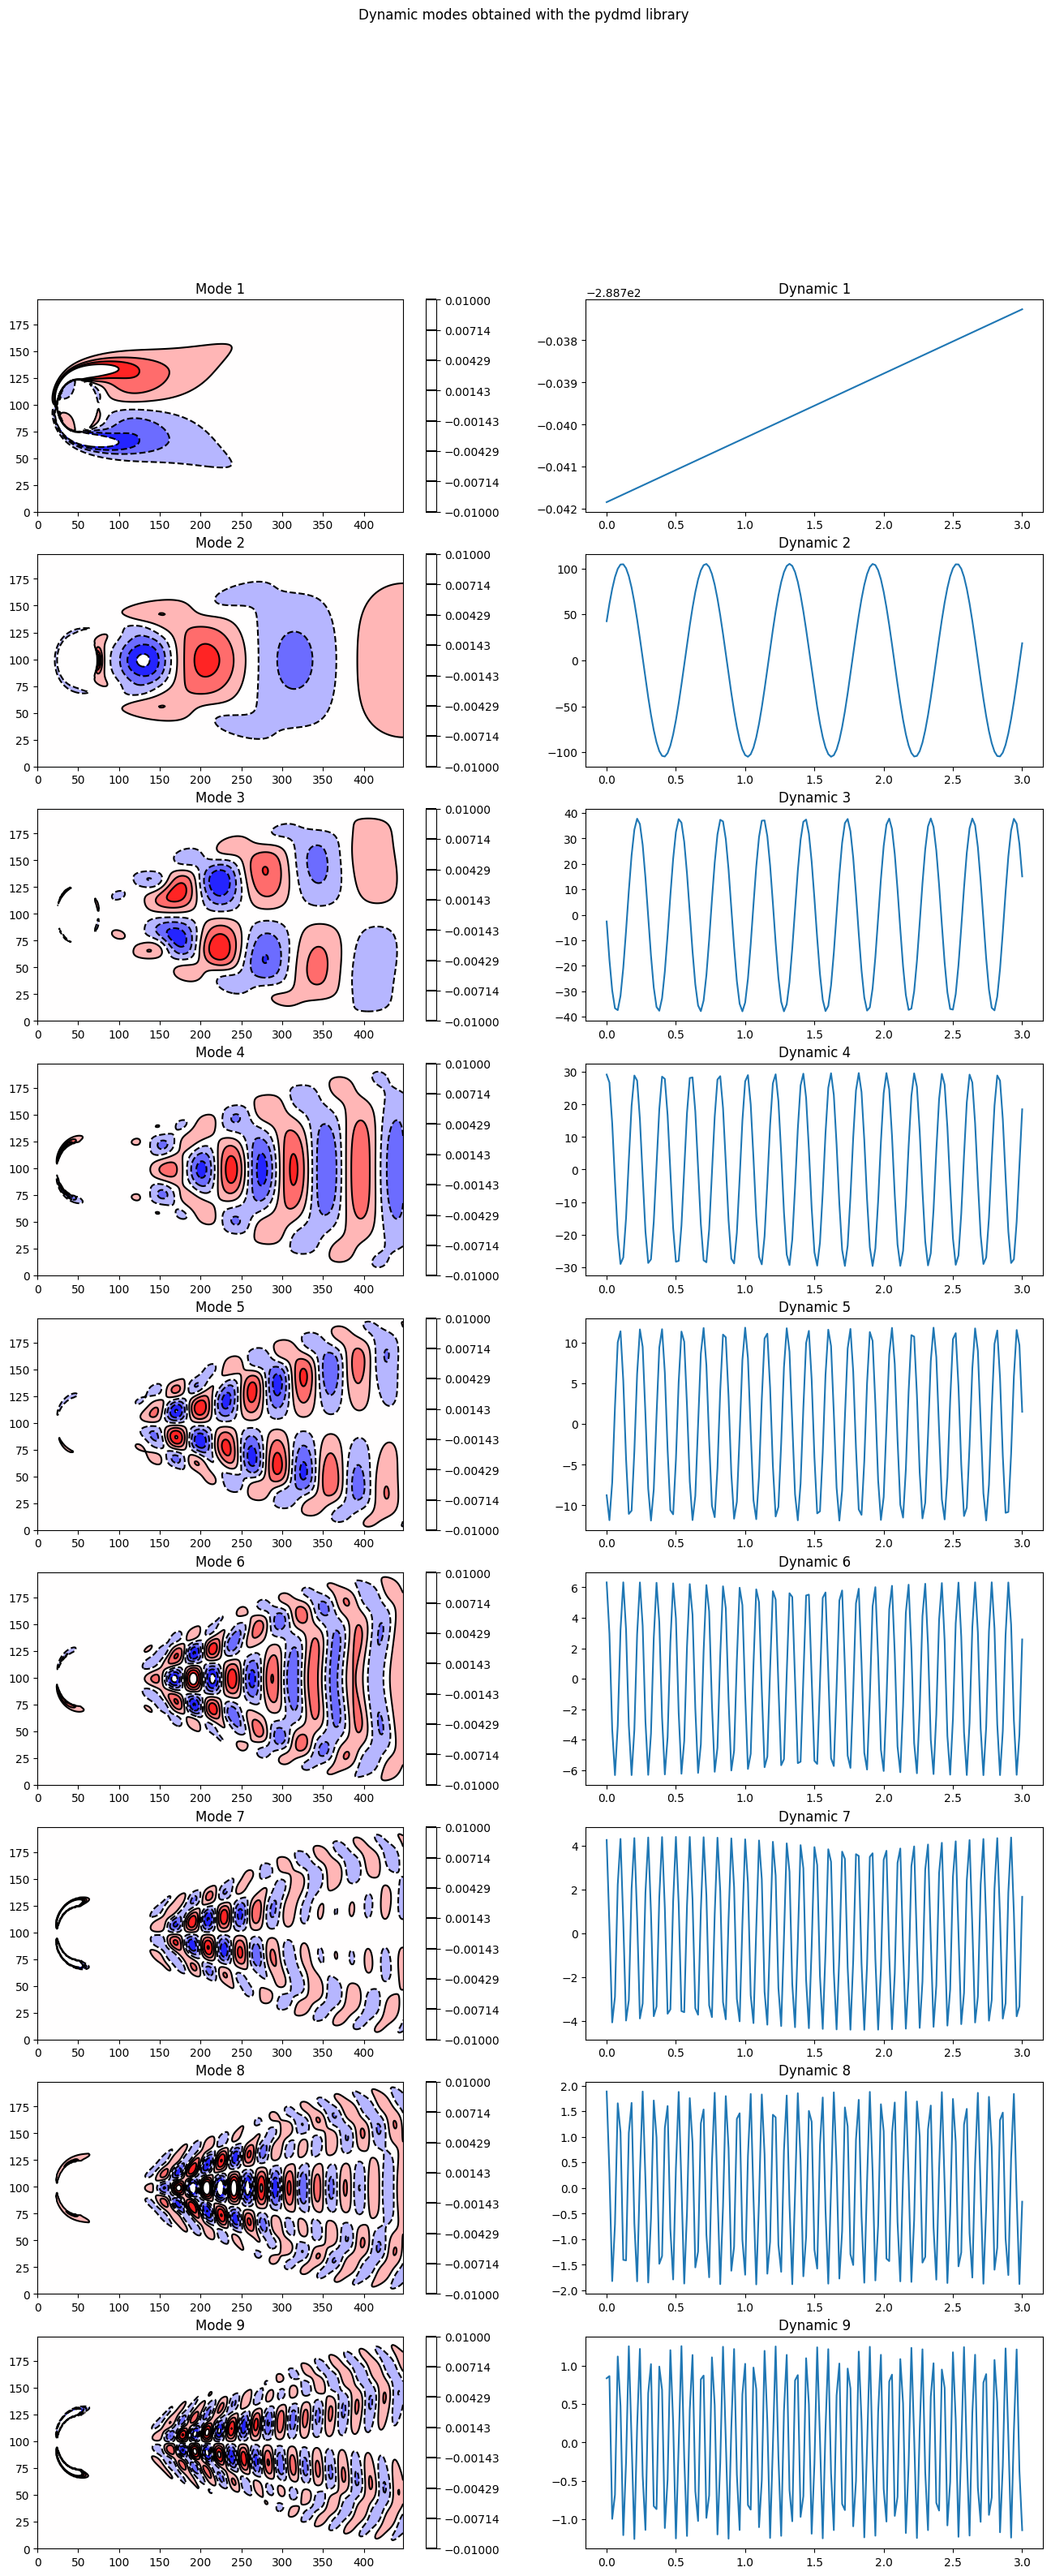

In [49]:
modes=dmd.modes.real.reshape(nx, ny, 21)
modes = modes[:, :, ::-1]

dynamics = dmd.dynamics
dynamics = dynamics[::-1,:]
dt = 0.02
t = np.linspace(0.0,150*dt,151)

fig = plt.figure(figsize=(16,36))

k=1
for i in range(21):
    if abs(eigs_dmd[i])>0.9 and np.imag(eigs_dmd[i])>=0 and k<=9 :
        ax = fig.add_subplot(9, 2, 2*k-1 )  # Add subplot to the figure
        
        # Define contour levels
        levels = np.linspace(-0.01, 0.01, 8)
    
        # Plot filled contours
        plt.contourf(modes[:, :, i], levels=levels, cmap='bwr')
    
        # Plot contour lines
        plt.contour(modes[:, :, i], levels=levels, colors='k')
    
        # Set title
        plt.title("Mode " + str(k))
    
        # Add colorbar
        plt.colorbar()

        ax = fig.add_subplot(9, 2, 2*k )  # Add subplot to the figure

        plt.plot(t,dynamics[i,:])

        plt.title("Dynamic " + str(k))

        k += 1
        print('Associated eigenvalue :', eigs_dmd[i])

plt.suptitle('Dynamic modes obtained with the pydmd library')
plt.show()

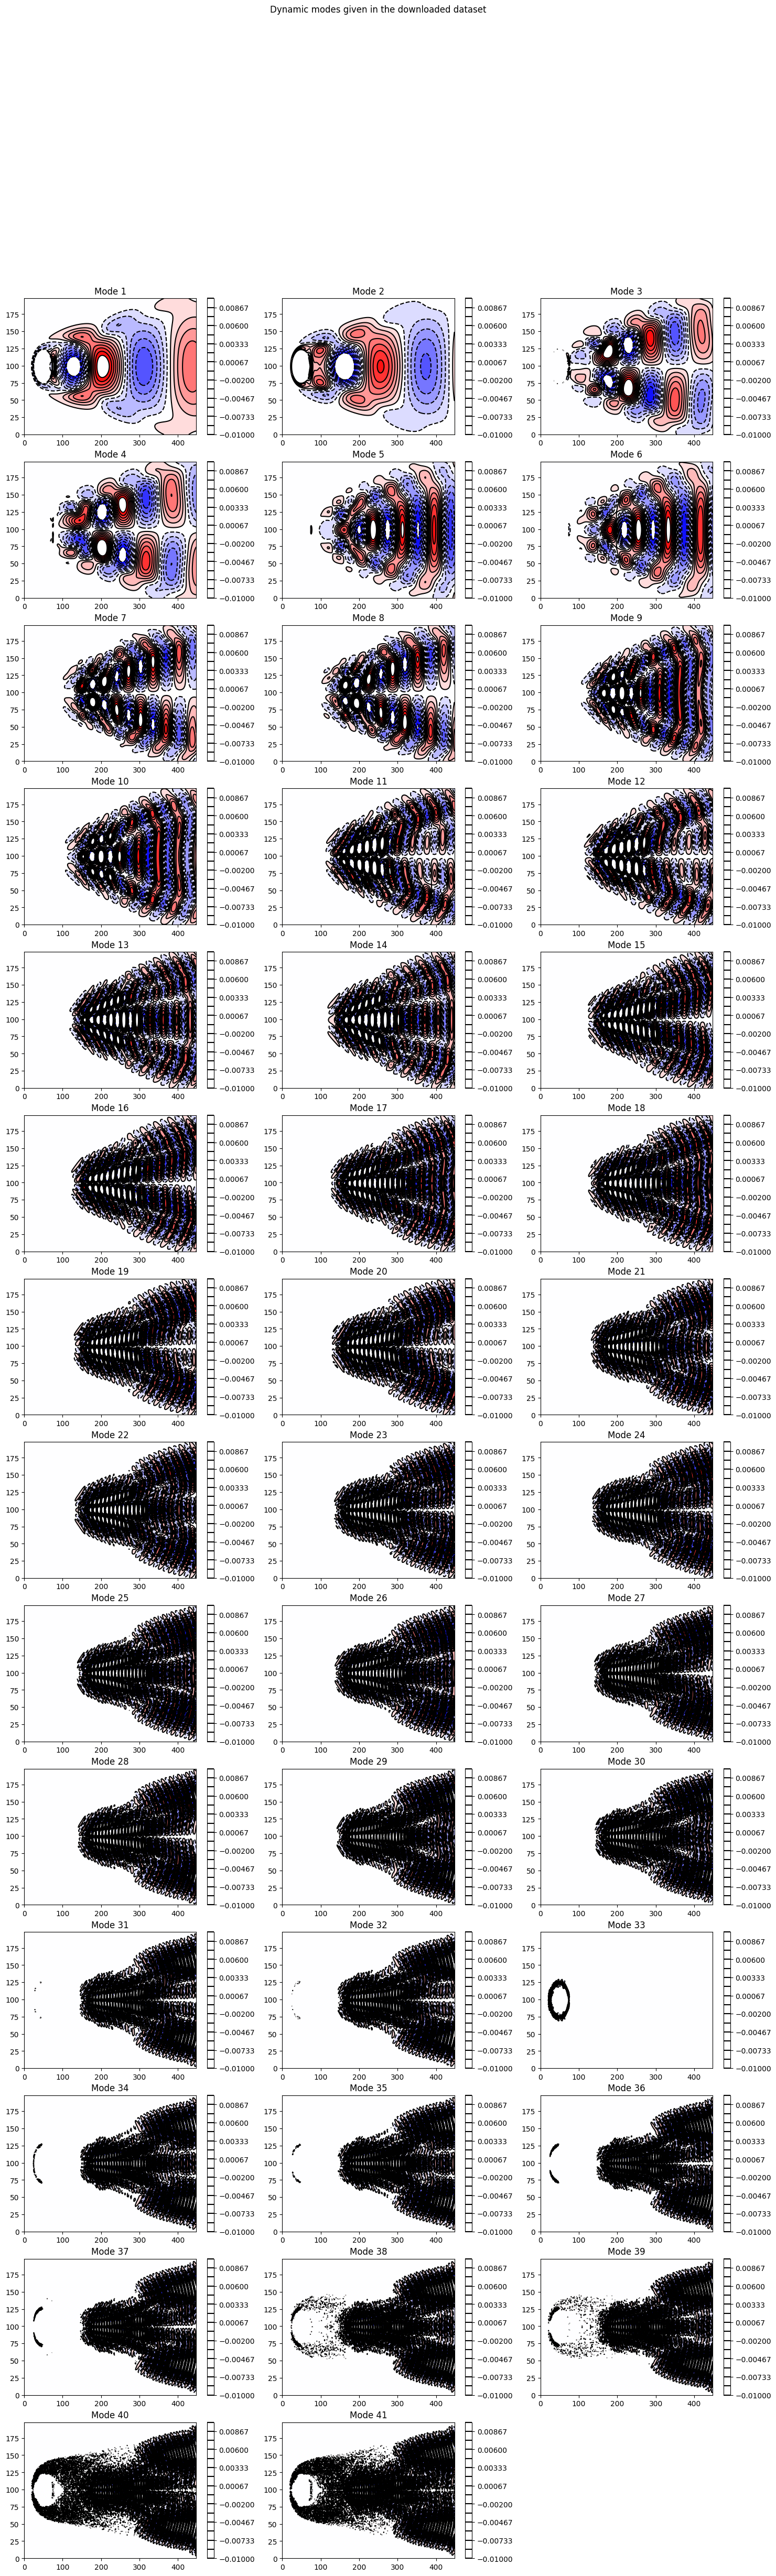

In [51]:
res = loadmat("DATA/CYLINDER_basis.mat")
res_modes = res['vortPHI'].reshape(ny, nx, 41)

fig = plt.figure(figsize=(18, 56))

for i in range(41):
    ax = fig.add_subplot(14, 3, i + 1)  # Add subplot to the figure
    # Define contour levels
    levels = np.linspace(-0.01, 0.01,16 )
    
    # Plot filled contours
    plt.contourf(res_modes[:, :, i].T, levels=levels, cmap='bwr')
    
    # Plot contour lines
    plt.contour(res_modes[:, :, i].T, levels=levels, colors='k')
    
    # Set title
    plt.title("Mode " + str(i + 1))
    
    # Add colorbar
    plt.colorbar()

plt.suptitle('Dynamic modes given in the downloaded dataset')
plt.show()

In [ ]:
from netCDF4 import Dataset


for i in range (200,1000):
    path = "C:/Users/UNiK/Desktop/Projet DMD ML/ncFiles/ncFiles/2DNS_"+i+".nc"
    nc_file = Dataset(path, "r")
    variable_U = nc_file.variables["U"]
    variable_V = nc_file.variables["U"]
    data_U = variable_U[:]



TypeError: can only concatenate str (not "int") to str